In [4]:
import random
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt
from Crypto.Util import number
import time
import sys, threading
from math import sqrt,floor

sys.setrecursionlimit(10**7)
threading.stack_size(2**27)




134217728

# Utility functions for RSA

In [5]:
def ConvertToInt(message_str):
  res = 0
  for i in range(len(message_str)):
    res = res * 256 + ord(message_str[i])
  return res

def ConvertToStr(n):
    res = ""
    while n > 0:
        res += chr(n % 256)
        n //= 256
    return res[::-1]

# this is an R2L recursive implementation that works for large integers
def PowMod(a, n, mod): 
    if n == 0:
        return 1 % mod
    elif n == 1:
        return a % mod
    else:
        b = PowMod(a, n // 2, mod)
        b = b * b % mod
        if n % 2 == 0:
          return b
        else:
          return b * a % mod

def IsPrime(n):
  if n == 2 or n == 3: return True
  if n < 2 or n%2 == 0: return False
  if n < 9: return True
  if n%3 == 0: return False
  r = int(n**0.5)
  # since all primes > 3 are of the form 6n ± 1
  # start with f=5 (which is prime)
  # and test f, f+2 for being prime
  # then loop by 6. 
  f = 5
  while f <= r:
    #print('\t',f)
    if n % f == 0: return False
    if n % (f+2) == 0: return False
    f += 6
  return True 

# REQ1) RSA functions

In [6]:

def RSA(n_bits):
    p = number.getPrime(n_bits // 2)
    q = number.getPrime(n_bits // 2)
    while p == q:
        q = number.getPrime(n_bits // 2)
    n=p*q
    phi=(p-1)*(q-1)
    e=random.randint(2,phi)
    while sp.gcd(e,phi) != 1:
        e=random.randint(2,phi) 

    d=sp.mod_inverse(e,phi)
    pu=e,n
    pr=d,n
    return pu,pr



def RSA_w_input(p,q,e):
    phi=(p-1)*(q-1)
    n_bits=32
    if(not(IsPrime(p)) or not(IsPrime(q)) or p==q or e<=1 or e>=phi or sp.gcd(e,phi)!=1):
        print("kaaaaaaaak")
        p = number.getPrime(n_bits // 2)
        q = number.getPrime(n_bits // 2)
        while p == q:
            q = number.getPrime(n_bits // 2)
        phi=(p-1)*(q-1)
    n=p*q
    e=random.randint(2,phi)
    while sp.gcd(e,phi) != 1:
        e=random.randint(2,phi) 

    d=sp.mod_inverse(e,phi)
    pu=e,n
    pr=d,n
    return pu,pr



def Encrypt(message,pu):
    e,n=pu
    return PowMod(message,e,n)

def Decrypt(cipher,pr):
    d,n=pr
    return PowMod(cipher,d,n)

mess="a"
n_bits=32
p = number.getPrime(n_bits // 2)
q = number.getPrime(n_bits // 2)
while p == q:
    q = number.getPrime(n_bits // 2)
n=p*q
phi=(p-1)*(q-1)
e=random.randint(2,phi)
while sp.gcd(e,phi) != 1:
    e=random.randint(2,phi) 
pu,pr=RSA_w_input(p,q,e)
cipher=Encrypt(ConvertToInt(mess),pu)
decipher=Decrypt(cipher,pr)
print(ConvertToStr(decipher))
    

a


# REQ3) RSA     encryption time - nbits

In [20]:
#key generation loop for req3

message="A"
message_int=ConvertToInt(message)

#make x linspace of range 1 to 1024
low=8
end=512
x=np.linspace(low,end,end-low+1)
#print(x[:200])
y=[]

keys=[]
for i in x:
    (e,n),(d,n)=RSA(int(i))
    keys.append((e,n))
    
   


In [21]:
counter=0

for i in x:
    elapsed_time=0
    (e,n)=keys[counter]
    for j in range(100):
        
        st=time.time()
        cipher=Encrypt(message_int,(e,n))
        et=time.time()
        elapsed_time+=(et-st)
    y.append(elapsed_time/100)
    counter+=1
    

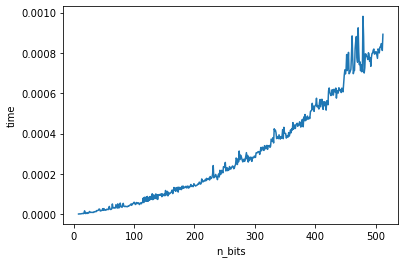

In [22]:
plt.plot(x, y)
plt.xlabel('n_bits')
plt.ylabel('time')
plt.show()


# Req4

In [23]:
#break RSA  for req 4
def break_RSA(pu):
    e,n=pu
    #get p,q
    for i in range(2,n//2):
        if n%i==0:
            p=i
            q=n//i
            break
    


    return p,q

(pu,_)=RSA(32)
print(pu)
p,q=break_RSA(pu)
assert(p*q==pu[1])

(2190869017, 2647450067)


In [24]:
#loop to generate keys
keys_to_break=[]

lower_range=8
upper_range=50
for i in range(lower_range,upper_range):
    (e,n),(d,n)=RSA(int(i))
    keys_to_break.append((e,n))

counter=0
time_array=[]
for i in range(lower_range,upper_range):
    time_taken=0
    #for k in range(1,2):
    st=time.time()
    p,q=break_RSA(keys_to_break[counter])
    et=time.time()
    time_taken=(et-st)
    time_array.append(time_taken)
    print(i,time_taken)
        
    counter+=1


    
 

8 2.6226043701171875e-06
9 3.5762786865234375e-06
10 2.384185791015625e-06
11 2.86102294921875e-06
12 1.6450881958007812e-05
13 3.5762786865234375e-06
14 4.76837158203125e-06
15 6.198883056640625e-06
16 9.298324584960938e-06
17 9.775161743164062e-06
18 1.3828277587890625e-05
19 5.030632019042969e-05
20 4.363059997558594e-05
21 3.552436828613281e-05
22 6.365776062011719e-05
23 5.7697296142578125e-05
24 0.00015354156494140625
25 0.00022077560424804688
26 0.0002987384796142578
27 0.00035381317138671875
28 0.0008404254913330078
29 0.0005984306335449219
30 0.0009870529174804688
31 0.0016040802001953125
32 0.00504755973815918
33 0.00406336784362793
34 0.010102272033691406
35 0.008409976959228516
36 0.015436887741088867
37 0.017702579498291016
38 0.02498483657836914
39 0.024625301361083984
40 0.0645747184753418
41 0.06059670448303223
42 0.13612699508666992
43 0.12749838829040527
44 0.3558812141418457
45 0.22503185272216797
46 0.4794588088989258
47 0.7043468952178955
48 0.9345428943634033
49 1

# req4 graph 

(42,)
(42,)


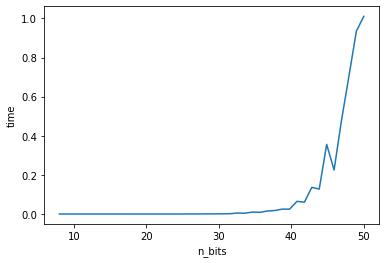

In [25]:

x_break=np.linspace(lower_range,upper_range,upper_range-lower_range)
print(x_break.shape)
print(np.array(time_array).shape)
#label

plt.plot(x_break,time_array)
plt.xlabel('n_bits')
plt.ylabel('time')
plt.show()

# Req 5

# Chosen Cipertext attack 
We have Alice who sends a message "M" to Bob encryoted with his public key (e,n). The encrypted message is C = M^e mod N

Eve intercepts C but can not decrypt it. So, Eve multiply C by a random number r raised to the power e and all modulo N. 
C_eve = C * r^e mod N

Then he sends it to Bob who decrypts it to C_eve^d mod N

Eve can now recover the original message M by multiplying the result from Bob by r^-1 mod N

(r ^ -1 )*(C_eve ^ d) Ξ (r ^-1 ) * ((C * (r^e))^d) Ξ (r ^-1) * (C^d) * (r^ed) Ξ (r ^ -1 ) * M * r Ξ M mod N 


In [68]:
# First generate the RSA at Bob's side
pu,pr = RSA(640)

e,n = pu

# Alice wants to send A message

message = "Hello I am Alice"
num = ConvertToInt(message)

cipher = Encrypt(num, pu )
print("Cipher is " + str(cipher))

# Eve can see the encrypted ciphrt
# Eve selects a random number
r = 250

# Eve encrypts r with the public key 
r_cipher = Encrypt(r, pu)

# Eve multiplies it by cipher mod N
cipher_2 = (r_cipher * cipher) % n

# Eve sends cipher_2 to Bob who decrypts it and send her what do you mean by this "result"

result = Decrypt(cipher_2, pr)

# Then Eve multiplies r_inverse by cipher_2 to get the message
recovered_num = ( sp.mod_inverse(r,n) * result) % n

recovered_messa = ConvertToStr(recovered_num)

print("###########################################")
print("Eve: The message = " + recovered_messa)
print("###########################################")

    

Cipher is 2105311483801309281954248444440412920697507045138368962176489223992048853929238354266164241032529673473069416301894867242000042016071570167557168370223797520600588134200797458098186401302027587
###########################################
Eve: The message = Hello I am Alice
###########################################
